<a href="https://colab.research.google.com/github/Malerion/Archives-Python/blob/main/Maxime_Tellier_DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

#EN
In this challenge, we will use decision trees in both a classification and regression task. We visualize each of these representations. We will use the `mpg` dataset. It's a car dataset.

# FR
Dans ce défi, nous allons utiliser des arbres de décision à la fois dans une tâche de classification et de régression. Nous visualiserons chacune de ces représentations. Nous utiliserons le jeu de données `mpg`. C'est un jeu de données sur les voitures.

# MISSION 1 : Regression Trees

# Exercice 1
# EN
- Drop the rows with missing values
- Drop the "name" column
- Transform the "origin" column (encode it) to represent the following:
  - USA = 0, Japan = 1, Europe = 2

# FR
- Supprimer les lignes avec des valeurs manquantes
- Supprimez la colonne "nom"
- Transformez la colonne "origine" (encodez-la) pour représenter ce qui suit :
  - États-Unis = 0, Japon = 1, Europe = 2

In [ ]:
# Load in the necessary libraries and the dataset
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt

data = sns.load_dataset("mpg")


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
# EXERCICE 1
# INSERT CODE HERE
#retirer les valeurs manquantes

data = data.dropna()

#retirer la colonne name
data = data.drop('name', axis=1)

# Transformer la colonne origin
data['origin'].map({'usa':0, 'japan':1, 'europe':2})

data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


# Exercice 2
# EN
- Prepare your X and y (mpg column) as a target.
- Split into train and test splits using random state of 42 and a test size of 20%.

# FR
- Préparez votre X et y (colonne mpg) comme cible.
- Diviser le dataset en 2 parties (entraînement et test) en utilisant un état aléatoire de 42 et une taille de test de 20 %.

In [ ]:
# Exercice 2
# INSERT CODE HERE

#préparation de X et y
X = data.drop('mpg', axis=1)
y = data['mpg']

#divier en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (313, 7)
X_test shape: (79, 7)
y_train shape: (313,)
y_test shape: (79,)


# Exercice 3

# EN
-  Fit a decision tree (Regression)

# FR
- Entraîne l'arbre de decision (Regression)

In [ ]:
# Exercice 3
# INSERT CODE HERE
X_train_encoded = pd.get_dummies(X_train, columns=['origin'])
X_test_encoded = pd.get_dummies(X_test, columns=['origin'])

regressor = tree.DecisionTreeRegressor(random_state=42)

regressor.fit(X_train_encoded, y_train)

y_pred = regressor.predict(X_test_encoded)

# Exercice 4

# EN
- Predict on the xtest set

# FR
- Réalise une prédiction sur le X_test.

In [ ]:
# Exercice 4
# INSERT CODE HERE
X_train_encoded = pd.get_dummies(X_train, columns=['origin'])
X_test_encoded = pd.get_dummies(X_test, columns=['origin'])

regressor = tree.DecisionTreeRegressor(random_state=42)

regressor.fit(X_train_encoded, y_train)

y_pred = regressor.predict(X_test_encoded)

# Exercice 5

# EN
- Print out the R2 score (train and test data).

# FR
- Affiche le score R2 (Entraînement et test).

In [ ]:
# Exercice 5
# INSERT CODE HERE
# One-hot encode the categorical variable 'origin' for both training and testing sets
X_train_encoded = pd.get_dummies(X_train, columns=['origin'])
X_test_encoded = pd.get_dummies(X_test, columns=['origin'])

# Make sure both sets have the same columns after one-hot encoding
missing_cols = set(X_train_encoded.columns) - set(X_test_encoded.columns)
for col in missing_cols:
    X_test_encoded[col] = 0

# Ensure columns are in the same order
X_test_encoded = X_test_encoded[X_train_encoded.columns]

# Initialize the decision tree regressor
regressor = tree.DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
regressor.fit(X_train_encoded, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test_encoded)

# Calculate R-squared score for the training set
r2_train = r2_score(y_train, regressor.predict(X_train_encoded))

# Calculate R-squared score for the test set
r2_test = r2_score(y_test, y_pred)

# Print out the R2 scores
print(f'R-squared score on the training set: {r2_train:.4f}')
print(f'R-squared score on the test set: {r2_test:.4f}')


R-squared score on the training set: 1.0000
R-squared score on the test set: 0.7957


# Exercice 6

# EN
- Print each feature with importance % using a method from the DecisionTree object.


# FR
- Affiche chaque caractéristique avec le % d'importance en utilisant une méthode de l'objet DecisionTree.



In [ ]:
# Exercice 6
# INSERT CODE HERE

feature_importances = regressor.feature_importances_


feature_importance_df = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': feature_importances
})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


for index, row in feature_importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']*100:.2f}%")


displacement: 63.04%
horsepower: 17.33%
model_year: 10.32%
weight: 6.07%
acceleration: 2.31%
origin_europe: 0.33%
origin_japan: 0.29%
origin_usa: 0.24%
cylinders: 0.07%


# Exercice 7

# EN
- Plot the decision tree (dataviz)
- Use column names as feature names and a max_depth of only 2

# FR
- Tracer l'arbre de décision (dataviz)
- Utilisez les noms de colonnes comme noms de fonctionnalités et un max_depth de seulement 2

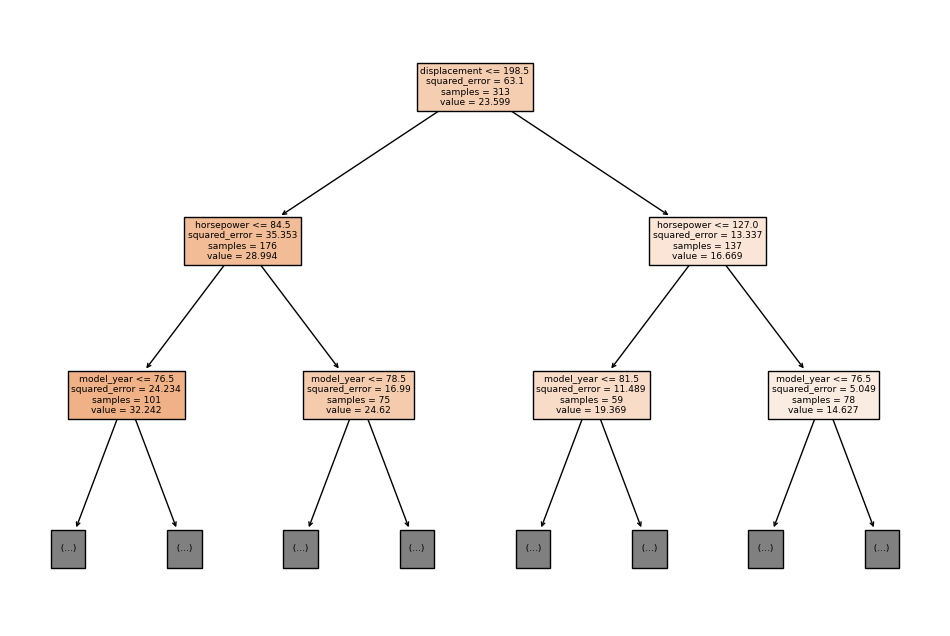

In [ ]:
# EXERCICE 7
# INSERT CODE HERE
plt.figure(figsize=(12, 8))
tree.plot_tree(regressor, feature_names=X_train_encoded.columns, filled=True, max_depth=2)
plt.show()

# MISSION 2 : Classification Trees

# EXERCICE 1

# EN
- Drop rows with missing values
- Turn the species column into numeric (encode it) :
  - Specifically, Adelie = 0, Chinstrap = 1, and Gentoo = 2
- Turn the island column into numeric (encode it) :
  - Specifically, Torgersen = 0, Biscoe = 1, Dream = 2

# FR
- Supprimer les lignes avec des valeurs manquantes
- Transformez la colonne des espèces en numérique (encodez-la) :
  - Plus précisément, Adelie = 0, Chinstrap = 1 et Gentoo = 2
- Transformez la colonne 'island' en numérique (encodez-la) :
  - Plus précisément, Torgersen = 0, Biscoe = 1, Dream = 2

In [ ]:
# Load in the Penguins dataset
data = sns.load_dataset('penguins')
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
# Exercice 1
# INSERT CODE HERE
data = sns.load_dataset('penguins')
data = data.dropna()


# Transform the "species" column
data['species'] = data['species'].map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})

# Transform the "island" column
data['island'] = data['island'].map({'Torgersen': 0, 'Biscoe': 1, 'Dream': 2})


print(data)


     species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0          0       0            39.1           18.7              181.0   
1          0       0            39.5           17.4              186.0   
2          0       0            40.3           18.0              195.0   
4          0       0            36.7           19.3              193.0   
5          0       0            39.3           20.6              190.0   
..       ...     ...             ...            ...                ...   
338        2       1            47.2           13.7              214.0   
340        2       1            46.8           14.3              215.0   
341        2       1            50.4           15.7              222.0   
342        2       1            45.2           14.8              212.0   
343        2       1            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
4  

# EXERCICE 2

# EN
- Save as variable your X and your y (column "sex")
- Using a random state of 42 and a test size of 0.20, split in training and testing sets.

# FR
- Enregistrez comme variable votre X et votre y (colonne "sex")
- Utilisation d'un état aléatoire de 42 et d'une taille de test de 0.20, divisé en ensembles d'apprentissage et de test.

In [ ]:
# Exercice 2
# INSERT CODE HERE
from sklearn.model_selection import train_test_split


X = data.drop('sex', axis=1)
y = data['sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (266, 6)
X_test shape: (67, 6)
y_train shape: (266,)
y_test shape: (67,)


# EXERCICE 3
# EN

-  Fit a decision tree (Classification)

# FR
- Entraîne l'arbre de decision (Classification)

In [ ]:
# Exercice 3
# INSERT CODE HERE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

classifier = DecisionTreeClassifier(random_state=42)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy on the test set: {accuracy:.4f}')

Accuracy on the test set: 0.8806


# Exercice 4

# EN
- Predict on the X_test set

# FR
- Réalise une prédiction sur le X_test.

In [ ]:
# Exercice 4
# INSERT CODE HERE
y_pred = classifier.predict(X_test)
print(y_pred)

['Female' 'Female' 'Male' 'Female' 'Male' 'Female' 'Male' 'Male' 'Female'
 'Male' 'Male' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Male' 'Female' 'Male' 'Female' 'Male' 'Male' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Male' 'Female' 'Male' 'Male' 'Female' 'Male'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Male' 'Male' 'Male' 'Female' 'Female' 'Male'
 'Female' 'Female' 'Male' 'Male' 'Female' 'Male' 'Male' 'Male' 'Male'
 'Male' 'Female' 'Female' 'Female' 'Male' 'Female']


# Exercice 5

# EN
- Print the accuracy score for the predictions (Train et test)

# FR
- Affiche le score de prédiction (Train & test)

In [ ]:
# Exercice 5
# INSERT CODE HERE
y_train_pred = classifier.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_pred)

print(f'Accuracy on the training set: {accuracy_train:.4f}')
print(f'Accuracy on the test set: {accuracy_test:.4f}')

Accuracy on the training set: 1.0000
Accuracy on the test set: 0.8806


# Exercice 6

# EN
- Print each feature with importance % using a method from the DecisionTree object.


# FR
- Affiche chaque caractéristique avec le % d'importance en utilisant une méthode de l'objet DecisionTree.

In [ ]:
# Exercice 6
# INSERT CODE HERE
feature_importances = classifier.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


for index, row in feature_importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']*100:.2f}%")

bill_depth_mm: 48.18%
body_mass_g: 40.17%
bill_length_mm: 9.24%
flipper_length_mm: 2.41%
species: 0.00%
island: 0.00%


# Exercice 7

# EN
- Plot the decision tree (dataviz)
- Use column names as feature names and a max_depth of only 2

# FR
- Tracer l'arbre de décision (dataviz)
- Utilisez les noms de colonnes comme noms de fonctionnalités et un max_depth de seulement 2

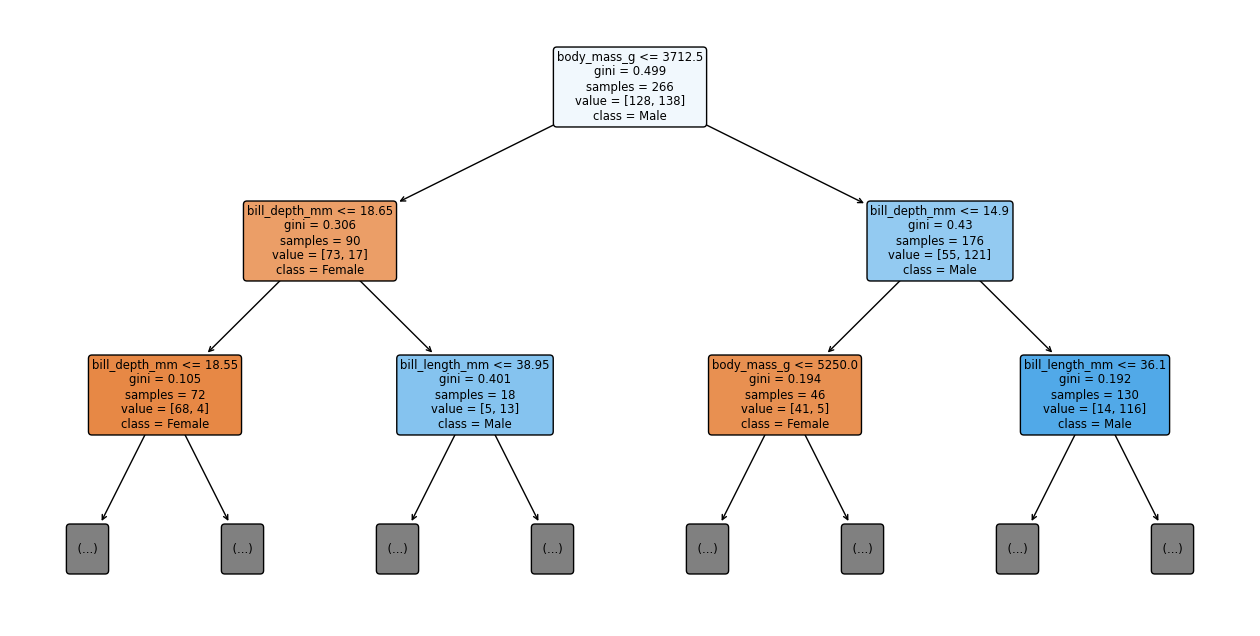

In [ ]:
# Exercice 7
# INSERT CODE HERE
from sklearn.tree import plot_tree


plt.figure(figsize=(16, 8))
plot_tree(classifier, feature_names=X_train.columns, class_names=classifier.classes_, filled=True, max_depth=2, rounded=True)
plt.show()


# EN

# Effects of Changing the Maximum Depth
In this section, we're going to see how changing the max_depth, which is one of the most important hyperparameters when it comes to decision trees, plays a part in the prediction accuracy.

*** This exercise is only done for you to see how big of an impact choosing the correct max_depth is!***

Choosing the correct max_depth (or any other hyperparameter for that matter) is typically done using cross validation or a more advanced technique (Grid Search, Random Search, Bayesian Optimization).

# Machine Learning Optimization
Using the above dataset, fit and predict the train and test sets using a max_depth from 1 to 10. For example, within the first iteration, you would fit the xtrain and ytrain datasets using max_depth=1, predict the xtest using this model, and then record the accuracy. On the next iteration, the max_depth would then be 2, etc.


# FR
# Effets de la modification de la profondeur maximale
Dans cette section, nous allons voir comment la modification de max_depth joue un rôle dans la précision de la prédiction. C'est l'un des hyperparamètres les plus importants pour les arbres de décision.

*** Cet exercice n'est fait que pour vous permettre de voir l'impact du choix de la profondeur max_correcte ! ***

Le choix de la profondeur max_correcte (ou de tout autre hyperparamètre d'ailleurs) se fait généralement à l'aide d'une validation croisée ou d'une technique plus avancée (Recherche par grille, recherche aléatoire, optimisation bayésienne).

# Optimisation d'algorithmes :
À l'aide de l'ensemble de données ci-dessus, ajustez et prédisez les ensembles d'entraînement et de test à l'aide d'un max_depth de 1 à 10.

***Vous allez faire varier la valeur max_depth du decision tree et l'entraîner pour obtenir le score (train et test) sur chaque changement de max_depth. Ce sera une boucle d'entraînement. ***

Par exemple, dans la première itération, vous ajusterez les ensembles de données xtrain et ytrain à l'aide de max_depth = 1, prédisez le xtest à l'aide de ce modèle, et puis enregistrez la précision. À la prochaine itération, le max_depth serait alors de 2, etc.

# Exercice 8

# EN
- Using a random state of 42, fit multiple decision trees with various max depths.
- Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))

# FR
- En utilisant un état aléatoire de 42, ajustez plusieurs arbres de décision avec différentes profondeurs maximales (max_depth).
- Enregistrez ces précisions dans une liste (c'est-à-dire list_of_accuracies.append(accuracy))

In [ ]:
# Using a random state of 42, fit multiple decision trees with various max depths.
# Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))
list_of_accuracies_train = []
list_of_accuracies_test = []

for depth in range(1, 11):
    classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    classifier.fit(X_train, y_train)
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    list_of_accuracies_train.append(accuracy_train)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    list_of_accuracies_test.append(accuracy_test)

for depth, train_acc, test_acc in zip(range(1, 11), list_of_accuracies_train, list_of_accuracies_test):
    print(f'Max Depth: {depth}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

  # INSERT CODE HERE


Max Depth: 1, Train Accuracy: 0.7293, Test Accuracy: 0.7015
Max Depth: 2, Train Accuracy: 0.8947, Test Accuracy: 0.8209
Max Depth: 3, Train Accuracy: 0.9286, Test Accuracy: 0.8358
Max Depth: 4, Train Accuracy: 0.9361, Test Accuracy: 0.8657
Max Depth: 5, Train Accuracy: 0.9586, Test Accuracy: 0.8358
Max Depth: 6, Train Accuracy: 0.9737, Test Accuracy: 0.8060
Max Depth: 7, Train Accuracy: 0.9887, Test Accuracy: 0.8657
Max Depth: 8, Train Accuracy: 0.9925, Test Accuracy: 0.8806
Max Depth: 9, Train Accuracy: 0.9962, Test Accuracy: 0.8806
Max Depth: 10, Train Accuracy: 0.9962, Test Accuracy: 0.8806


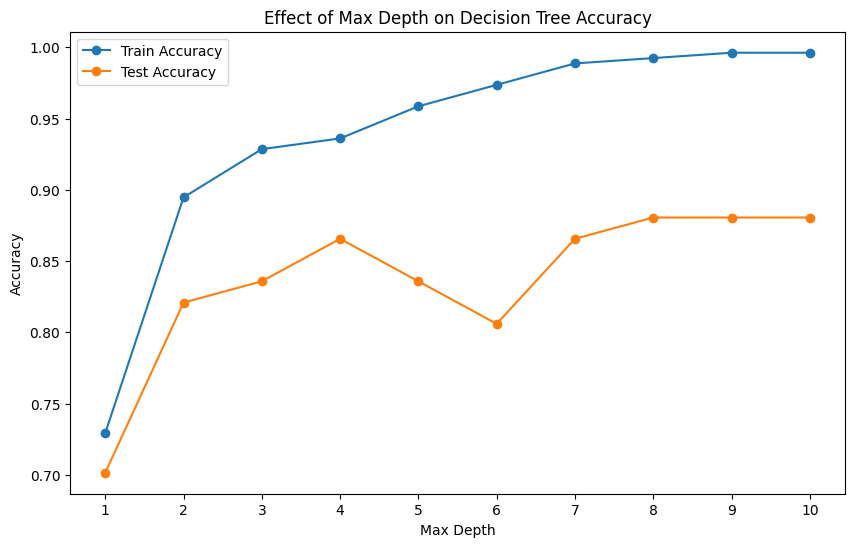

In [ ]:
# Plot these accuracies using matplotlib with the accuracies on the y-axis and the max_depth on the x-axis.
# INSERT CODE HERE
import matplotlib.pyplot as plt

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), list_of_accuracies_train, label='Train Accuracy', marker='o')
plt.plot(range(1, 11), list_of_accuracies_test, label='Test Accuracy', marker='o')
plt.title('Effect of Max Depth on Decision Tree Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))
plt.legend()
plt.show()

In [ ]:
#